[*********************100%***********************]  1 of 1 completed


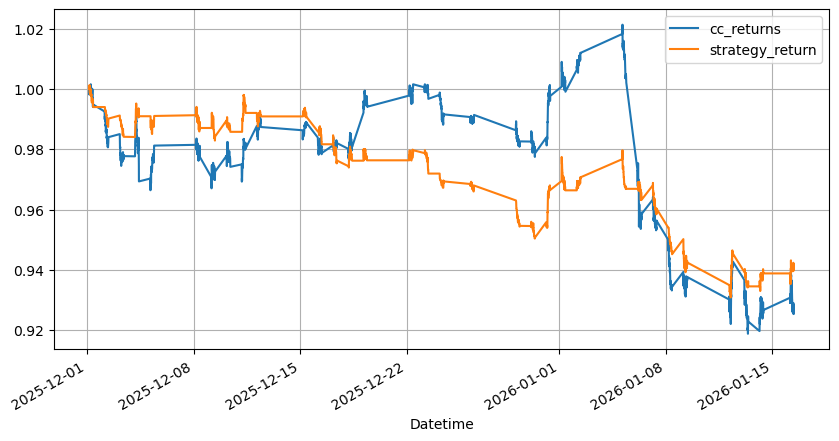

Buy and hold returns: 0.93
strategy returns: 0.94


,Open,Close,Adj Close,cc_returns,ema,position,strategy_return
Datetime,,,,,,,
2026-01-16 09:35:00+00:00,1458.000000,1457.000000,1457.000000,0.999383,1458.622666,0.0,1.000000
2026-01-16 09:40:00+00:00,1457.000000,1456.699951,1456.699951,0.999794,1457.981761,0.0,1.000000
2026-01-16 09:45:00+00:00,1456.699951,1458.000000,1458.000000,1.000892,1457.987841,0.0,1.000000
2026-01-16 09:50:00+00:00,1458.099976,1459.500000,1459.500000,1.001029,1458.491894,1.0,1.001029
2026-01-16 09:55:00+00:00,1459.500000,1461.199951,1461.199951,1.001165,1459.394580,1.0,1.001165


In [5]:
# Importing all required libraries
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

# Selecting the timeperiod range for which the analysis will be done
end1 = datetime.datetime.today().date()  # Selecting today's date
start1 = end1 - pd.Timedelta(days=50)  # Selecting date from which analysis will start

# Importing data via yfinance library
df = yf.download('RELIANCE.NS', start=start1, end=end1, interval='5m', auto_adjust=False,multi_level_index=False)

df = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]  # Arranging columns
df = df.drop(['High', 'Low', 'Volume'], axis=1)  # Dropping unnecessary columns
            
df['cc_returns'] = df['Close'].pct_change()  # Percentage change from previous to current price

# Create EMA column with 5 period window
ema = 5
df['ema'] = df['Close'].ewm(span=ema, adjust=False).mean() 


# Create position column - LONG-SHORT strategy
# +1 = Long (buy) when Close > EMA
# -1 = Short (sell) when Close < EMA
df['position'] = np.where(df['Close'] > df['ema'], 1,-1)
df['position'] = df['position'].shift(1)


# Create position column - buy when close > ema, otherwise 0
df['position'] = np.where(df['Close'] > df['ema'], 1, 0)
df['position'] = df['position'].shift(1)

#df['position'].value_counts()[If you want to count how many time trades have been generated]

df['strategy_return']=df['position']*df['cc_returns'] #Creating column to know strategy return over backtesting period

df['strategy_return']=1+df['strategy_return'] #as calculating simple return we are doing+1 in every return just basic simple return calculation
df['cc_returns']=1+df['cc_returns']


df[['cc_returns','strategy_return']].cumprod().plot(grid=True,figsize=(10,5))
plt.show()

#Comparing startegy return with only buy and hold strategy
print('Buy and hold returns:',np.round(df['cc_returns'].cumprod()[-1],2)) 
print('strategy returns:',np.round(df['strategy_return'].cumprod()[-1],2))

df.tail()